In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv(r'C:\Users\ashna\OneDrive\Documents\School\UMGC\Capstone Two - Final Project\Prediction of Student success\dataset.csv')

In [3]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import category_encoders as ce


encoder = ce.OneHotEncoder(cols=['Target'], use_cat_names=True,
                        return_df=True)

data_encoded=encoder.fit_transform(df)
data_encoded

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Dropout,Target_Graduate,Target_Enrolled
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
1,1,6,1,11,1,1,1,1,3,4,...,6,6,13.666667,0,13.9,-0.3,0.79,0,1,0
2,1,1,5,5,1,1,1,22,27,10,...,0,0,0.000000,0,10.8,1.4,1.74,1,0,0
3,1,8,2,15,1,1,1,23,27,6,...,10,5,12.400000,0,9.4,-0.8,-3.12,0,1,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,13.000000,0,13.9,-0.3,0.79,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,8,5,12.666667,0,15.5,2.8,-4.06,0,1,0
4420,1,1,2,15,1,1,19,1,1,10,...,6,2,11.000000,0,11.1,0.6,2.02,1,0,0
4421,1,1,1,12,1,1,1,22,27,10,...,9,1,13.500000,0,13.9,-0.3,0.79,1,0,0
4422,1,1,1,9,1,1,1,22,27,8,...,6,5,12.000000,0,9.4,-0.8,-3.12,0,1,0


In [5]:
X = data_encoded[['Mother\'s occupation', 'Age at enrollment']]
y = data_encoded['Target_Graduate']

In [6]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_encoded[['Mother\'s occupation', 'Age at enrollment']], data_encoded['Target_Graduate'], test_size=.2, random_state=1)

In [8]:
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
training_accuracy = []
test_accuracy = []
accuracy_difference = []

learning_rates = [1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    y_predict_training = gb.predict(X_train)
    y_predict_test = gb.predict(X_test)
    tr_accuracy = accuracy_score(y_predict_training, y_train)
training_accuracy.append(tr_accuracy)
tst_accuracy = accuracy_score(y_predict_test, y_test)
test_accuracy.append(tst_accuracy)
accuracy_difference.append(tst_accuracy - tr_accuracy)

print(test_accuracy)
print(training_accuracy)


[0.5954802259887005]
[0.6343599886973721]


[Training Classification Report]
              precision    recall  f1-score   support

           0       0.68      0.52      0.59      1774
           1       0.61      0.75      0.67      1765

    accuracy                           0.63      3539
   macro avg       0.64      0.63      0.63      3539
weighted avg       0.64      0.63      0.63      3539

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.64      0.44      0.52       441
           1       0.57      0.75      0.65       444

    accuracy                           0.60       885
   macro avg       0.60      0.59      0.59       885
weighted avg       0.60      0.60      0.59       885



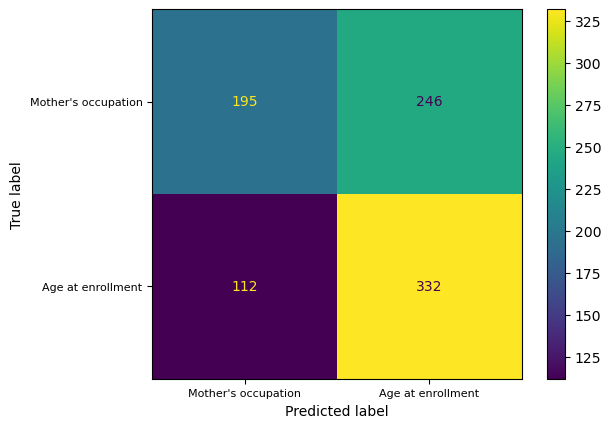

In [10]:

cm = confusion_matrix(y_test, y_predict_test, labels = gb.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Mother\'s occupation', 'Age at enrollment'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['Mother\'s occupation', 'Age at enrollment'], fontsize = 8)
ax.set_yticklabels(labels = ['Mother\'s occupation', 'Age at enrollment'], fontsize = 8)
display_cm.plot(ax = ax)



print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))
#
print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))